In [27]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_fac5a051a4cf46739b08369e9506134d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='LjFZwumLPwdP_vPEEUz_U4Jt7kh0Y64-Fu5aS2NSAJBi',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_fac5a051a4cf46739b08369e9506134d.get_object(Bucket='pythonnotebook-donotdelete-pr-xi6r2kerhpuc6z',Key='menu.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,210,23.0,36,9.0,46,1.0,...,31,10,4,18,3,26,15,2,30,20
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,40,13.0,65,0.0,...,38,13,2,7,3,19,10,8,15,15
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,...,43,14,3,12,4,19,15,8,20,20
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",5.4 oz (153 g),410,180,20.0,32,11.0,56,0.0,...,36,12,2,7,3,20,2,8,15,10
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,220,25.0,38,12.0,59,0.0,...,42,14,3,12,4,20,6,8,15,15


Cek data yang hilang:

In [17]:
print(data.isnull().any())

Category                         False
Item                             False
Serving Size                     False
Calories                         False
Calories from Fat                False
Total Fat                        False
Total Fat (% Daily Value)        False
Saturated Fat                    False
Saturated Fat (% Daily Value)    False
Trans Fat                        False
Cholesterol                      False
Cholesterol (% Daily Value)      False
Sodium                           False
Sodium (% Daily Value)           False
Carbohydrates                    False
Carbohydrates (% Daily Value)    False
Dietary Fiber                    False
Dietary Fiber (% Daily Value)    False
Sugars                           False
Protein                          False
Vitamin A (% Daily Value)        False
Vitamin C (% Daily Value)        False
Calcium (% Daily Value)          False
Iron (% Daily Value)             False
dtype: bool


In [18]:
print(data.describe())

          Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std         5.321873                   

Mean=  368.2692307692308
Median=  340.0


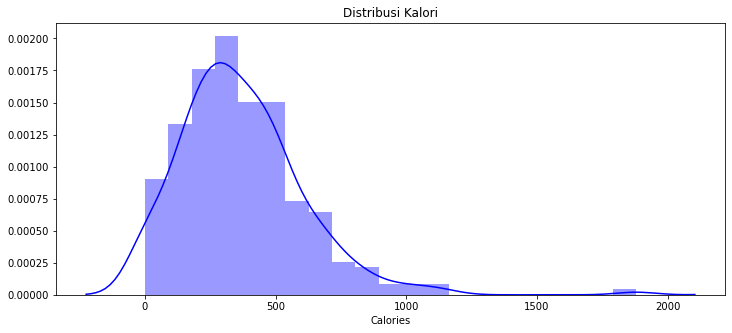

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
plt.title("Distribusi Kalori")
ax = sns.distplot(data["Calories"], color = 'blue')

print("Mean= ", data.Calories.mean())
print("Median= ", data.Calories.median())

In [20]:
#How much do beverages, like soda or coffee, contribute to the overall caloric intake?
data.set_index('Item', inplace=True)
data.head()

,Category,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Item,,,,,,,,,,,,,,,,,,,,,
Egg McMuffin,Breakfast,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,...,31,10,4,17,3,17,10,0,25,15
Egg White Delight,Breakfast,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,...,30,10,4,17,3,18,6,0,25,8
Sausage McMuffin,Breakfast,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,...,29,10,4,17,2,14,8,0,25,10
Sausage McMuffin with Egg,Breakfast,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,...,30,10,4,17,2,21,15,0,30,15
Sausage McMuffin with Egg Whites,Breakfast,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,...,30,10,4,17,2,21,6,0,25,10


In [21]:
print(data.loc[data['Category'] == 'Beverages'])

                                    Category       Serving Size  Calories  \
Item                                                                        
Coca-Cola Classic (Small)          Beverages       16 fl oz cup       140   
Coca-Cola Classic (Medium)         Beverages       21 fl oz cup       200   
Coca-Cola Classic (Large)          Beverages       30 fl oz cup       280   
Coca-Cola Classic (Child)          Beverages       12 fl oz cup       100   
Diet Coke (Small)                  Beverages       16 fl oz cup         0   
Diet Coke (Medium)                 Beverages       21 fl oz cup         0   
Diet Coke (Large)                  Beverages       30 fl oz cup         0   
Diet Coke (Child)                  Beverages       12 fl oz cup         0   
Dr Pepper (Small)                  Beverages       16 fl oz cup       140   
Dr Pepper (Medium)                 Beverages       21 fl oz cup       190   
Dr Pepper (Large)                  Beverages       30 fl oz cup       270   

In [22]:
pd.set_option('display.max_rows', None)
df_menu = data.loc[data['Category'] == 'Beverages', 'Calories']
print(df_menu)

Item
Coca-Cola Classic (Small)            140
Coca-Cola Classic (Medium)           200
Coca-Cola Classic (Large)            280
Coca-Cola Classic (Child)            100
Diet Coke (Small)                      0
Diet Coke (Medium)                     0
Diet Coke (Large)                      0
Diet Coke (Child)                      0
Dr Pepper (Small)                    140
Dr Pepper (Medium)                   190
Dr Pepper (Large)                    270
Dr Pepper (Child)                    100
Diet Dr Pepper (Small)                 0
Diet Dr Pepper (Medium)                0
Diet Dr Pepper (Large)                 0
Diet Dr Pepper (Child)                 0
Sprite (Small)                       140
Sprite (Medium)                      200
Sprite (Large)                       280
Sprite (Child)                       100
1% Low Fat Milk Jug                  100
Fat Free Chocolate Milk Jug          130
Minute Maid 100% Apple Juice Box      80
Minute Maid Orange Juice (Small)     150
Minute Maid

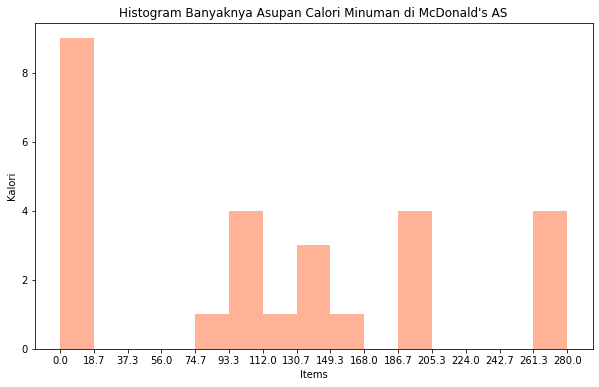

In [23]:
import numpy as np
# let's get the x-tick values
count, bin_edges = np.histogram(df_menu, 15)

# un-stacked histogram
df_menu.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title("Histogram Banyaknya Asupan Calori Minuman di McDonald's AS")
plt.ylabel('Kalori')
plt.xlabel('Items')

plt.show()

In [24]:
df_menu = data.loc[data['Category'] == 'Beverages']
print(df_menu)

                                    Category       Serving Size  Calories  \
Item                                                                        
Coca-Cola Classic (Small)          Beverages       16 fl oz cup       140   
Coca-Cola Classic (Medium)         Beverages       21 fl oz cup       200   
Coca-Cola Classic (Large)          Beverages       30 fl oz cup       280   
Coca-Cola Classic (Child)          Beverages       12 fl oz cup       100   
Diet Coke (Small)                  Beverages       16 fl oz cup         0   
Diet Coke (Medium)                 Beverages       21 fl oz cup         0   
Diet Coke (Large)                  Beverages       30 fl oz cup         0   
Diet Coke (Child)                  Beverages       12 fl oz cup         0   
Dr Pepper (Small)                  Beverages       16 fl oz cup       140   
Dr Pepper (Medium)                 Beverages       21 fl oz cup       190   
Dr Pepper (Large)                  Beverages       30 fl oz cup       270   

Mean=  113.70370370370371
Median=  100.0


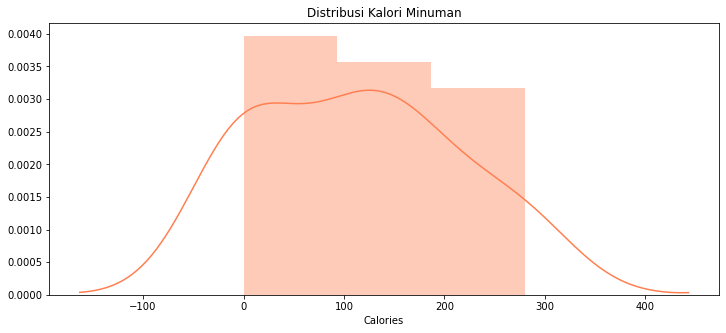

In [25]:
plt.figure(figsize=(12,5))
plt.title("Distribusi Kalori Minuman")
ax = sns.distplot(df_menu["Calories"], color = 'coral')

print("Mean= ", df_menu.Calories.mean())
print("Median= ", df_menu.Calories.median())

In [36]:
#Filter Kategori Sandwich
sandwich_menu = data[data['Item'].str.contains('Sandwich')]
#Filter kolom
sandwich_menu = sandwich_menu.iloc[:,[1,6,8,11,13,15,17,20,21,22]]
#Buat kolom baru nilai total keseluruhan nilai nutrisi
sandwich_menu['Total Daily Value'] = sandwich_menu.sum(axis=1)
#Buat Kolom baru buat yg ekstrak Item tsb Crispy/Grilled
sandwich_menu['Chicken Type'] = sandwich_menu['Item'].str.extract("(Crispy|Grilled)")
#Ini untuk mengkategorikan jenis daging
sandwich_menu['Item Type'] = sandwich_menu['Item'].str.extract("(Classic|Club|Ranch|Bacon|Southern)")
sandwich_menu

,Item,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Total Daily Value,Chicken Type,Item Type
57,Premium Crispy Chicken Classic Sandwich,33,18,16,41,18,13,4,6,15,164,Crispy,Classic
58,Premium Grilled Chicken Classic Sandwich,13,9,22,34,14,13,4,8,15,132,Grilled,Classic
59,Premium Crispy Chicken Club Sandwich,51,44,29,59,19,14,8,20,30,274,Crispy,Club
60,Premium Grilled Chicken Club Sandwich,31,36,35,52,15,13,8,20,30,240,Grilled,Club
61,Premium Crispy Chicken Ranch BLT Sandwich,43,31,24,58,19,13,4,20,15,227,Crispy,Ranch
62,Premium Grilled Chicken Ranch BLT Sandwich,23,22,30,51,14,13,4,20,15,192,Grilled,Ranch
63,Bacon Clubhouse Crispy Chicken Sandwich,59,51,31,72,22,15,8,25,30,313,Crispy,Bacon
64,Bacon Clubhouse Grilled Chicken Sandwich,39,42,37,65,17,15,8,30,30,283,Grilled,Bacon
65,Southern Style Crispy Chicken Sandwich,29,15,14,38,14,7,4,2,15,138,Crispy,Southern


In [37]:
df_total= sandwich_menu.groupby('Chicken Type').sum()
df_total

,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Total Daily Value
Chicken Type,,,,,,,,,,
Crispy,215,159,114,268,92,62,28,73,105,1116
Grilled,106,109,124,202,60,54,24,78,90,847


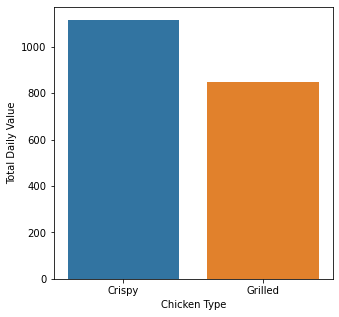

In [38]:
df_total.reset_index(inplace=True)
plt.figure(figsize=(5,5))
sns.barplot(df_total['Chicken Type'], df_total['Total Daily Value'], estimator=sum)
plt.show()

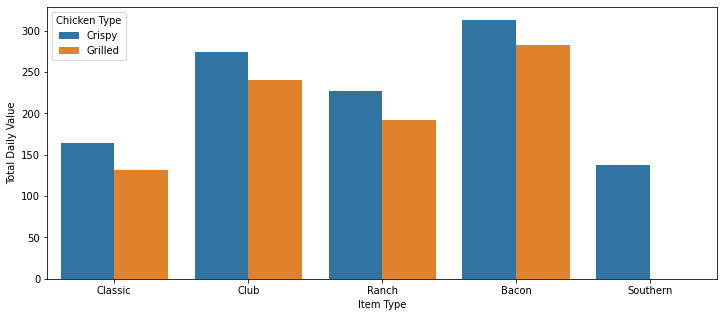

In [39]:
plt.figure(figsize=(12,5))
sns.barplot(sandwich_menu['Item Type'], sandwich_menu['Total Daily Value'], hue=sandwich_menu['Chicken Type'])
plt.show()

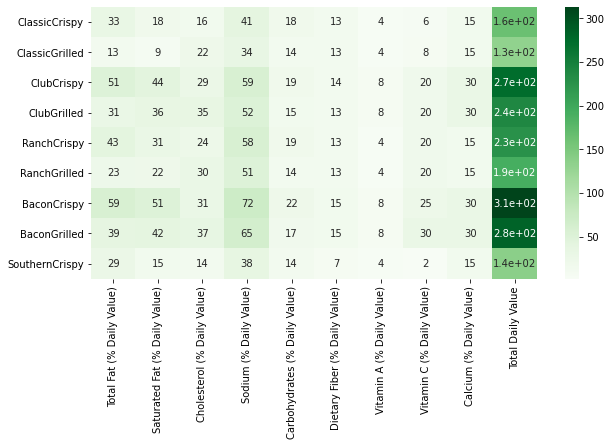

In [40]:
#HeatMap
plt.figure(figsize=(10,5))
sns.heatmap(sandwich_menu.iloc[:,1:11], cmap='Greens', annot=True, 
            yticklabels=sandwich_menu['Item Type']+sandwich_menu['Chicken Type'])
plt.show()

How much do beverages, like soda or coffee, contribute to the overall caloric intake?

In [41]:
#Filter Kategori Sandwich
kalori_minuman = data[data['Category'].str.contains('Beverages|Coffee & Tea|Smoothies & Shakes')]

#Menambahkan kolom total kalori dari kolom kalori dan kalori lemak
kalori_minuman = kalori_minuman.iloc[:,0:5]
kalori_minuman['Total Kalori'] = kalori_minuman['Calories']+kalori_minuman['Calories from Fat']

mean_kalori_minuman = kalori_minuman.groupby('Category').mean().sort_values(by='Total Kalori')
mean_kalori_minuman

,Calories,Calories from Fat,Total Kalori
Category,,,
Beverages,113.703704,0.740741,114.444444
Coffee & Tea,283.894737,71.105263,355.000000
Smoothies & Shakes,531.428571,127.678571,659.107143


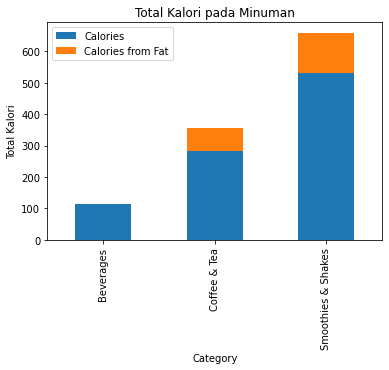

In [42]:
mean_kalori_minuman.iloc[:,:2].plot(kind='bar', stacked=True)
plt.title('Total Kalori pada Minuman')
plt.ylabel('Total Kalori')
plt.show()

In [43]:
#Filter Kategori Minuman
kalori_minuman = data[data['Category'].str.contains('Beverages|Coffee & Tea|Smoothies & Shakes')]

#Menambahkan kolom total kalori dari kolom kalori dan kalori lemak
kalori_minuman = kalori_minuman.iloc[:,0:5]
kalori_minuman['Jenis Minuman'] = kalori_minuman['Item'].str.extract("(Frappé|Tea|Coffee|Latte|Mocha|Hot Chocolate|Smoothie|Shake|McFlurry)")
kalori_minuman['Total Kalori'] = kalori_minuman['Calories']+kalori_minuman['Calories from Fat']

#Kategorikan minuman per Tema

mean_kalori_minuman = kalori_minuman.groupby('Jenis Minuman').mean().sort_values(by='Total Kalori')
mean_kalori_minuman

,Calories,Calories from Fat,Total Kalori
Jenis Minuman,,,
Tea,82.500000,0.000000,82.500000
Coffee,145.555556,50.000000,195.555556
Smoothie,268.888889,7.222222,276.111111
Latte,257.333333,48.333333,305.666667
Mocha,347.916667,80.416667,428.333333
Hot Chocolate,393.333333,89.166667,482.500000
McFlurry,596.250000,191.250000,787.500000
Frappé,584.444444,215.555556,800.000000
Shake,699.090909,180.000000,879.090909


In [44]:
kalori_minuman.isnull().head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Jenis Minuman,Total Kalori
110,False,False,False,False,False,True,False
111,False,False,False,False,False,True,False
112,False,False,False,False,False,True,False
113,False,False,False,False,False,True,False
114,False,False,False,False,False,True,False


In [45]:
kalori_minuman["Jenis Minuman"].fillna("Beverages", inplace = True) 

In [46]:
print(data.isnull().any())

Category                         False
Item                             False
Serving Size                     False
Calories                         False
Calories from Fat                False
Total Fat                        False
Total Fat (% Daily Value)        False
Saturated Fat                    False
Saturated Fat (% Daily Value)    False
Trans Fat                        False
Cholesterol                      False
Cholesterol (% Daily Value)      False
Sodium                           False
Sodium (% Daily Value)           False
Carbohydrates                    False
Carbohydrates (% Daily Value)    False
Dietary Fiber                    False
Dietary Fiber (% Daily Value)    False
Sugars                           False
Protein                          False
Vitamin A (% Daily Value)        False
Vitamin C (% Daily Value)        False
Calcium (% Daily Value)          False
Iron (% Daily Value)             False
dtype: bool


In [47]:
mean_kalori_minuman = kalori_minuman.groupby('Jenis Minuman').mean().sort_values(by='Total Kalori')
mean_kalori_minuman

,Calories,Calories from Fat,Total Kalori
Jenis Minuman,,,
Tea,82.500000,0.000000,82.500000
Beverages,113.703704,0.740741,114.444444
Coffee,145.555556,50.000000,195.555556
Smoothie,268.888889,7.222222,276.111111
Latte,257.333333,48.333333,305.666667
Mocha,347.916667,80.416667,428.333333
Hot Chocolate,393.333333,89.166667,482.500000
McFlurry,596.250000,191.250000,787.500000
Frappé,584.444444,215.555556,800.000000


Kesimpulan

In [48]:
#Filter Kategori Minuman
kalori_minuman = data[data['Category'].str.contains('Beverages|Coffee & Tea|Smoothies & Shakes')]

#Menambahkan kolom total kalori dari kolom kalori dan kalori lemak
kalori_minuman = kalori_minuman.iloc[:,0:5]
kalori_minuman['Jenis Minuman'] = kalori_minuman['Item'].str.extract("(Water|Juice|Milk Jug|Frappé|Tea|Coffee|Latte|Mocha|Hot Chocolate|Smoothie|Shake|McFlurry)")
kalori_minuman["Jenis Minuman"].fillna("Soda", inplace = True) 
kalori_minuman['Total Kalori'] = kalori_minuman['Calories']+kalori_minuman['Calories from Fat']

#Kategorikan minuman per Tema

mean_kalori_minuman = kalori_minuman.groupby('Jenis Minuman').mean().sort_values(by='Total Kalori')
mean_kalori_minuman

,Calories,Calories from Fat,Total Kalori
Jenis Minuman,,,
Water,0.000000,0.000000,0.000000
Tea,82.500000,0.000000,82.500000
Soda,107.000000,0.000000,107.000000
Milk Jug,115.000000,10.000000,125.000000
Juice,175.000000,0.000000,175.000000
Coffee,145.555556,50.000000,195.555556
Smoothie,268.888889,7.222222,276.111111
Latte,257.333333,48.333333,305.666667
Mocha,347.916667,80.416667,428.333333


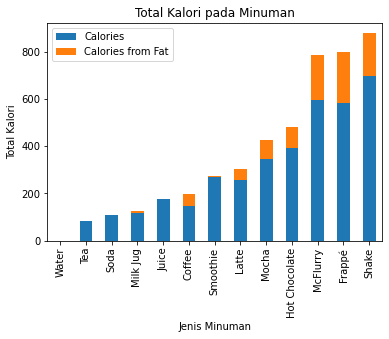

In [49]:
mean_kalori_minuman.iloc[:,:2].plot(kind='bar', stacked=True)
plt.title('Total Kalori pada Minuman')
plt.ylabel('Total Kalori')
plt.show()

In [50]:
#Ambil data yang ada kata "with egg" dan 6 nama menu yg sama yg ingin dibandingkan di kolom itemnya
egg_menu = data[data['Item'].str.contains("with Egg")]
egg_menu = egg_menu[egg_menu['Item'].str.contains("Sausage McMuffin|Sausage Biscuit")]
#Select kolom & buat kolom baru berisi Total nilai nutrisi sehari-hari
egg_menu = egg_menu.iloc[:,[1,6,8,11,13,15,17,20,21,22,23]]
egg_menu['Total Daily Value'] = egg_menu.sum(axis=1)
#Menambah 
egg_menu['Egg Type'] = egg_menu['Item'].str.extract("(Egg Whites)")
egg_menu['Egg Type'].fillna('Egg', axis=0, inplace=True)
egg_menu['Menu'] = egg_menu['Item'].str.extract("(Large Biscuit|Regular Biscuit|Sausage McMuffin)")

egg_menu=egg_menu.sort_values(by='Menu')
egg_menu

,Item,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Total Daily Value,Egg Type,Menu
13,Sausage Biscuit with Egg (Large Biscuit),57,74,83,53,14,11,10,0,10,20,332,Egg,Large Biscuit
15,Sausage Biscuit with Egg Whites (Large Biscuit),49,65,11,54,13,11,4,0,8,15,230,Egg Whites,Large Biscuit
12,Sausage Biscuit with Egg (Regular Biscuit),50,71,83,49,12,6,6,0,10,20,307,Egg,Regular Biscuit
14,Sausage Biscuit with Egg Whites (Regular Biscuit),42,62,11,49,11,6,0,0,8,15,204,Egg Whites,Regular Biscuit
3,Sausage McMuffin with Egg,43,52,95,36,10,17,15,0,30,15,313,Egg,Sausage McMuffin
4,Sausage McMuffin with Egg Whites,35,42,16,37,10,17,6,0,25,10,198,Egg Whites,Sausage McMuffin


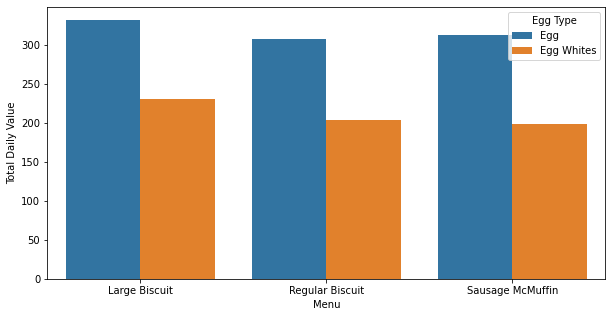

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(egg_menu['Menu'], egg_menu['Total Daily Value'], hue=egg_menu['Egg Type'])
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(egg_menu.iloc[:,1:11], cmap='BuPu', annot=True, 
            yticklabels=egg_menu['Item'])
plt.show()

# Pertanyaan 5
## "What is the least number of items could you order from the menu to meet one day's nutritional requirements?"

In [28]:
least_order=data.iloc[:,[1,6,8,11,13,15,17,20,21,22,23]]
least_order

,Item,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Egg McMuffin,20,25,87,31,10,17,10,0,25,15
1,Egg White Delight,12,15,8,32,10,17,6,0,25,8
2,Sausage McMuffin,35,42,15,33,10,17,8,0,25,10
3,Sausage McMuffin with Egg,43,52,95,36,10,17,15,0,30,15
4,Sausage McMuffin with Egg Whites,35,42,16,37,10,17,6,0,25,10
5,Steak & Egg McMuffin,36,46,100,40,10,18,15,2,30,20
6,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",40,65,83,54,13,7,10,8,15,15
7,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",47,68,83,59,14,12,15,8,20,20
8,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",32,56,11,54,12,7,2,8,15,10
9,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",38,59,11,59,14,12,6,8,15,15


In [29]:
least_order.describe()

,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,21.815385,29.965385,18.392308,20.676923,15.780769,6.530769,13.426923,8.534615,20.973077,7.734615
std,21.885199,26.639209,29.091653,24.034954,9.419544,6.307057,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,4.750000,2.000000,4.750000,10.000000,0.000000,2.000000,0.000000,6.000000,0.000000
50%,17.000000,24.000000,11.000000,8.000000,15.000000,5.000000,8.000000,0.000000,20.000000,4.000000
75%,35.000000,48.000000,21.250000,36.250000,20.000000,10.000000,15.000000,4.000000,30.000000,15.000000
max,182.000000,102.000000,192.000000,150.000000,47.000000,28.000000,170.000000,240.000000,70.000000,40.000000


In [30]:
max_index

NameError: name 'max_index' is not defined

In [31]:
#Memasukan nilai maksimum
max_index=[]
for i in least_order.describe().columns:
    max_index.extend(least_order[least_order[i]==least_order.describe().loc['max',i]].index.tolist())
#Menghilangkan duplikasi nilai
index_set = set(max_index)
#Dibuat menjadi list
max_list = list(index_set)

max_list

[32, 89, 34, 135, 82, 84, 246, 88, 249, 253, 31]

In [32]:
max_data = least_order.iloc[max_list,:]
max_data.head(2)

,Item,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
32,Big Breakfast with Hotcakes (Large Biscuit),93,100,192,94,39,28,15,2,30,40
89,Premium Southwest Salad with Grilled Chicken,13,13,23,28,9,28,170,30,15,15


In [33]:
from itertools import combinations

for i in combinations(max_data.index,6):
    table = least_order.iloc[list(i),:]
    l = []
    for n in max_data.columns[1:]:
        m = table[n].sum()
        l.append(m)
    #Asumsikan nilai maksimum per items sebanyak 90
    if all(l>=50*np.ones(10)):
        print(i)
        break

(32, 89, 34, 135, 82, 84)


In [34]:
minimum_order = least_order.iloc[list(i),:]
minimum_order

,Item,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
32,Big Breakfast with Hotcakes (Large Biscuit),93,100,192,94,39,28,15,2,30,40
89,Premium Southwest Salad with Grilled Chicken,13,13,23,28,9,28,170,30,15,15
34,Big Breakfast with Hotcakes and Egg Whites (La...,77,81,19,95,38,28,4,2,25,30
135,Minute Maid Orange Juice (Large),0,0,0,0,22,0,0,240,4,0
82,Chicken McNuggets (40 piece),182,101,89,150,39,24,0,15,8,25
84,Premium Bacon Ranch Salad (without Chicken),11,18,9,13,3,12,170,30,15,6


If we order that six items, we can meet one day’s nutritional requirements.

However, meeting one day’s nutritional requirements from those items doesn’t imply that the combination is healthy. We must be aware of overnutrition in some nutrition like Fat, Cholesterol, etc. Here is the %Daily Value if we eat that 6 items in one day:

In [35]:
for s in least_order.describe().columns:
    print(s,': ', minimum_order[s].sum())

Total Fat (% Daily Value) :  376
Saturated Fat (% Daily Value) :  313
Cholesterol (% Daily Value) :  332
Sodium (% Daily Value) :  380
Carbohydrates (% Daily Value) :  150
Dietary Fiber (% Daily Value) :  120
Vitamin A (% Daily Value) :  359
Vitamin C (% Daily Value) :  319
Calcium (% Daily Value) :  97
Iron (% Daily Value) :  116
